This is a journal used to create the data ingestion and processing pipeline for generating air quality index as part of the NASA Spaceapps challenge 2025. This will involve a number of steps
1. Data ingestion and formatting
2. Exploratory data analysis
3. Data transformation - Structuring data for use with typical geospatial analysis tools
4. Exporting data as geojson file

In [8]:
# Import required libraries for data fusion and geospatial analysis
import pandas as pd
import geopandas as gpd
import pyreadr
import rasterio
import matplotlib.pyplot as plt
import numpy as np      

# Initial testing will use the elemental carbon (EC) data from the 2019 Earth Observatory dataset. This data is formatted as an RDS file, so 
# a bit of work will be needed to convert it to a more useable format. First, we will get it into a dataframe and take a look at the structure.
ecData = pyreadr.read_r('sourceData/ec_2019_urban.rds')
ecDF = ecData[None]  # Extract the dataframe from the dictionary
print(ecDF.head())

        lon        lat  final.predicted.ec
0 -84.46366  39.121681            0.638953
1 -84.46305  39.121624            0.844281
2 -84.46244  39.121567            0.848295
3 -84.46183  39.121510            0.850415
4 -84.46122  39.121453            0.836431


In [ ]:
# Trim the data for our area of interest, using lat/long bounds for the state of Georgia, USA
minLat, maxLat = 30.357851, 35.000659
minLon, maxLon = -85.605165, -80.839729

trimmedEC = ecDF[(ecDF['lat'] >= minLat) & (ecDF['lat'] <= maxLat) & (ecDF['lon'] >= minLon) & (ecDF['lon'] <= maxLon)]

# We'll also rename the third column to something easier to work with and describe the data to get a sense of the distribution of EC values
trimmedEC = trimmedEC.rename(columns={trimmedEC.columns[2]: 'ec'})
print(trimmedEC.head())

# Let's also describe the data to get a sense of the distribution of EC values
print(trimmedEC['ec'].describe())


               lon        lat        ec
8169608 -85.038510  35.000632  0.373149
8170855 -85.043177  35.000618  0.381394
8170856 -85.042603  35.000564  0.379585
8170857 -85.042028  35.000509  0.379897
8170858 -85.041453  35.000455  0.370810


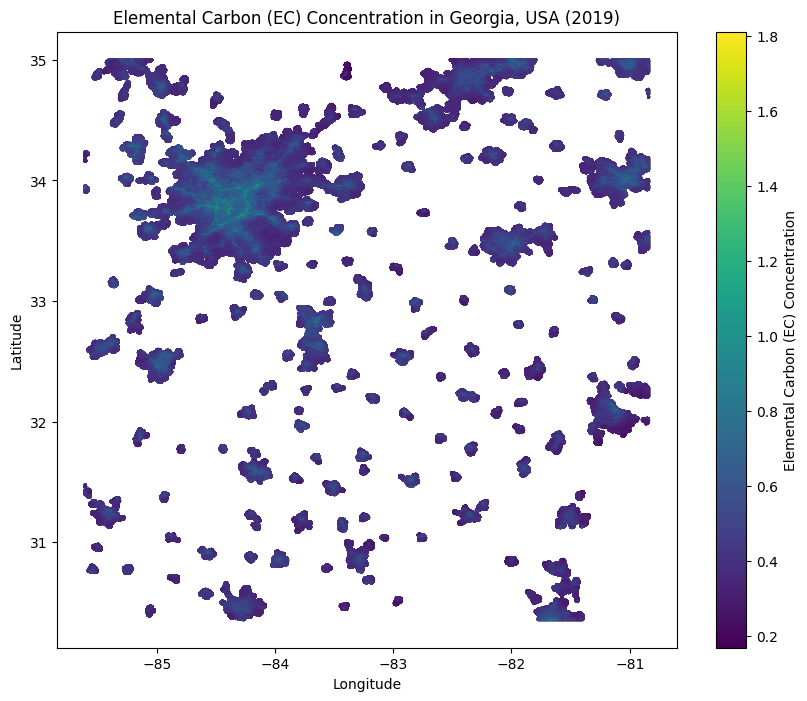

In [13]:
# The description of the data says these are grid cells with a resolution of 50m for urban areas, and 1km for rural area. We can visualize the data to confirm this.
plt.figure(figsize=(10, 8))
plt.scatter(trimmedEC['lon'], trimmedEC['lat'], c=trimmedEC['ec'], cmap='viridis', s=1)
plt.colorbar(label='Elemental Carbon (EC) Concentration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Elemental Carbon (EC) Concentration in Georgia, USA (2019)')
plt.show()  